
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [50]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns

### 2. Загрузка данных

In [51]:
sales_df = pd.read_csv('sales.csv')
sales_df

SalePrice  GrLivArea  GarageArea  OverallQual Street SaleCondition
0        208500       1710         548            7   Pave        Normal
1        181500       1262         460            6   Pave        Normal
2        223500       1786         608            7   Pave        Normal
3        140000       1717         642            7   Pave       Abnorml
4        250000       2198         836            8   Pave        Normal
...         ...        ...         ...          ...    ...           ...
1455     175000       1647         460            6   Pave        Normal
1456     210000       2073         500            6   Pave        Normal
1457     266500       2340         252            7   Pave        Normal
1458     142125       1078         240            5   Pave        Normal
1459     147500       1256         276            5   Pave        Normal

[1460 rows x 6 columns]

### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

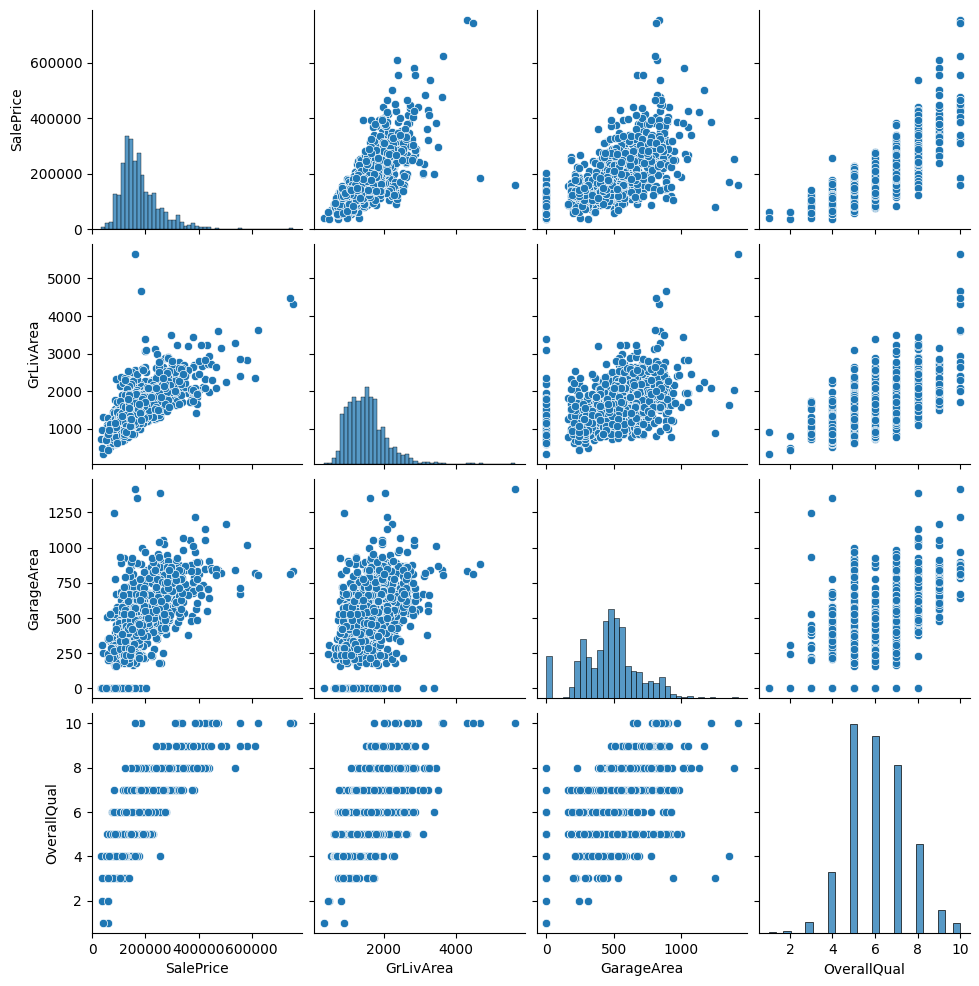

In [52]:
sns.pairplot(sales_df)

In [53]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [54]:
sales_df.describe(include='all')

SalePrice    GrLivArea   GarageArea  OverallQual Street  \
count     1460.000000  1460.000000  1460.000000  1460.000000   1460   
unique            NaN          NaN          NaN          NaN      2   
top               NaN          NaN          NaN          NaN   Pave   
freq              NaN          NaN          NaN          NaN   1454   
mean    180921.195890  1515.463699   472.980137     6.099315    NaN   
std      79442.502883   525.480383   213.804841     1.382997    NaN   
min      34900.000000   334.000000     0.000000     1.000000    NaN   
25%     129975.000000  1129.500000   334.500000     5.000000    NaN   
50%     163000.000000  1464.000000   480.000000     6.000000    NaN   
75%     214000.000000  1776.750000   576.000000     7.000000    NaN   
max     755000.000000  5642.000000  1418.000000    10.000000    NaN   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

In [55]:
# Категориальные признаки - количество значений

display(sales_df['Street'].unique())

display(sales_df['SaleCondition'].unique())

sales_df['OverallQual'].unique()

array(['Pave', 'Grvl'], dtype=object)

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [56]:
# Кодируем категориальные признаки

streets = pd.get_dummies(sales_df['Street'], dtype='int', prefix='Street_')
display(streets)

conditions = pd.get_dummies(sales_df['SaleCondition'], dtype='int', prefix='SaleCondition_')
display(conditions)

qualities = pd.get_dummies(sales_df['OverallQual'], dtype='int', prefix='OverallQual_')
qualities

Street__Grvl  Street__Pave
0                0             1
1                0             1
2                0             1
3                0             1
4                0             1
...            ...           ...
1455             0             1
1456             0             1
1457             0             1
1458             0             1
1459             0             1

[1460 rows x 2 columns]

SaleCondition__Abnorml  SaleCondition__AdjLand  SaleCondition__Alloca  \
0                          0                       0                      0   
1                          0                       0                      0   
2                          0                       0                      0   
3                          1                       0                      0   
4                          0                       0                      0   
...                      ...                     ...                    ...   
1455                       0                       0                      0   
1456                       0                       0                      0   
1457                       0                       0                      0   
1458                       0                       0                      0   
1459                       0                       0                      0   

      SaleCondition__Family  SaleCondition__Normal  SaleCondition__Partial  
0                         0                      1                       0  
1                         0                      1                       0  
2                         0                      1                       0  
3                         0                      0                       0  
4                         0                      1                       0  
...                     ...                    ...                     ...  
1455                      0                      1                       0  
1456                      0                      1                       0  
1457                      0                      1                       0  
1458                      0                      1                       0  
1459                      0                      1                       0  

[1460 rows x 6 columns]

OverallQual__1  OverallQual__2  OverallQual__3  OverallQual__4  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
1455               0               0               0               0   
1456               0               0               0               0   
1457               0               0               0               0   
1458               0               0               0               0   
1459               0               0               0               0   

      OverallQual__5  OverallQual__6  OverallQual__7  OverallQual__8  \
0                  0               0               1               0   
1                  0               1               0               0   
2                  0               0               1               0   
3                  0               0               1               0   
4                  0               0               0               1   
...              ...             ...             ...             ...   
1455               0               1               0               0   
1456               0               1               0               0   
1457               0               0               1               0   
1458               1               0               0               0   
1459               1               0               0               0   

      OverallQual__9  OverallQual__10  
0                  0                0  
1                  0                0  
2                  0                0  
3                  0                0  
4                  0                0  
...              ...              ...  
1455               0                0  
1456               0                0  
1457               0                0  
1458               0                0  
1459               0                0  

[1460 rows x 10 columns]

In [57]:
sales_without_cat_columns = sales_df.drop(columns=['Street', 'SaleCondition', 'OverallQual'])
sales_without_cat_columns

SalePrice  GrLivArea  GarageArea
0        208500       1710         548
1        181500       1262         460
2        223500       1786         608
3        140000       1717         642
4        250000       2198         836
...         ...        ...         ...
1455     175000       1647         460
1456     210000       2073         500
1457     266500       2340         252
1458     142125       1078         240
1459     147500       1256         276

[1460 rows x 3 columns]

In [58]:
sales_df_2 = pd.concat([sales_without_cat_columns, streets, conditions, qualities], axis=1)
sales_df_2

SalePrice  GrLivArea  GarageArea  Street__Grvl  Street__Pave  \
0        208500       1710         548             0             1   
1        181500       1262         460             0             1   
2        223500       1786         608             0             1   
3        140000       1717         642             0             1   
4        250000       2198         836             0             1   
...         ...        ...         ...           ...           ...   
1455     175000       1647         460             0             1   
1456     210000       2073         500             0             1   
1457     266500       2340         252             0             1   
1458     142125       1078         240             0             1   
1459     147500       1256         276             0             1   

      SaleCondition__Abnorml  SaleCondition__AdjLand  SaleCondition__Alloca  \
0                          0                       0                      0   
1                          0                       0                      0   
2                          0                       0                      0   
3                          1                       0                      0   
4                          0                       0                      0   
...                      ...                     ...                    ...   
1455                       0                       0                      0   
1456                       0                       0                      0   
1457                       0                       0                      0   
1458                       0                       0                      0   
1459                       0                       0                      0   

      SaleCondition__Family  SaleCondition__Normal  ...  OverallQual__1  \
0                         0                      1  ...               0   
1                         0                      1  ...               0   
2                         0                      1  ...               0   
3                         0                      0  ...               0   
4                         0                      1  ...               0   
...                     ...                    ...  ...             ...   
1455                      0                      1  ...               0   
1456                      0                      1  ...               0   
1457                      0                      1  ...               0   
1458                      0                      1  ...               0   
1459                      0                      1  ...               0   

      OverallQual__2  OverallQual__3  OverallQual__4  OverallQual__5  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
1455               0               0               0               0   
1456               0               0               0               0   
1457               0               0               0               0   
1458               0               0               0               1   
1459               0               0               0               1   

      OverallQual__6  OverallQual__7  OverallQual__8  OverallQual__9  \
0                  0               1               0               0   
1                  1               0               0               0   
2                  0               1               0               0   
3                  0               1               0               0   
4                  0               0               1               0   
...              .

### Вывод
Смотря на графики можно точно сказать что переменная SalePrice линейно зависима от остальных переменных

Дополнительные переменные по данным не найдены, но для улучшения точности можно было бы преобразовать столбцы *Area в категориальные путем разделения площади квартир, гаражей на категории где например самая малая площадь обозначалась цифрой 1, а большая числом 20

### 4. Разделение на обучающую и тестовую выборки

In [59]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(sales_df_2, train_size=0.7, random_state=42)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [60]:
from sklearn.linear_model import LinearRegression

train_x = train.drop(['SalePrice'],axis=1)
train_y = train['SalePrice']

test_x = test.drop(['SalePrice'],axis=1)
test_y = test['SalePrice']

model = LinearRegression()
model.fit(train_x, train_y)



LinearRegression()

In [64]:
print('w_0:', model.intercept_)
print('w_1:', model.coef_)

w_0: 104416.83693948788
w_1: [ 4.33514706e+01  5.94401971e+01  8.08251778e+03 -8.08251778e+03
 -1.19654186e+04 -7.02753480e+03  2.42430778e+04 -1.96382169e+04
 -2.58501177e+03  1.69731043e+04 -7.04338677e+04 -6.73595400e+04
 -7.16609126e+04 -5.22170863e+04 -3.73994695e+04 -2.08908035e+04
  4.87240034e+03  5.16141327e+04  1.24283167e+05  1.39191980e+05]


### 6. Получение предсказаний для обучающей и тестовой выборок

In [61]:

y_predict_train = model.predict(train_x)
y_predict_test = model.predict(test_x)

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(train_y, y_predict_train)
test_mse = mean_squared_error(test_y, y_predict_test)

display(train_mse)
test_mse

1418572837.631952

1290799349.7773046

In [63]:
train_mae = mean_absolute_error(train_y, y_predict_train)
test_mae = mean_absolute_error(test_y, y_predict_test)

display(train_mae)
test_mae

24081.82725060153

24203.970676813937

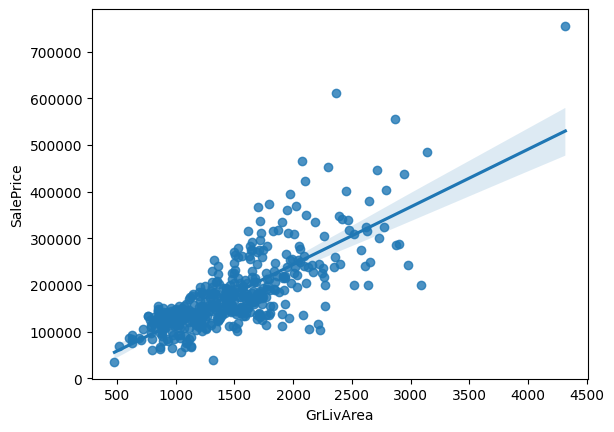

In [66]:
# построим графики зависимости

# реальный
sns.regplot(x=test_x['GrLivArea'], y=test_y)

<Axes: xlabel='GrLivArea'>

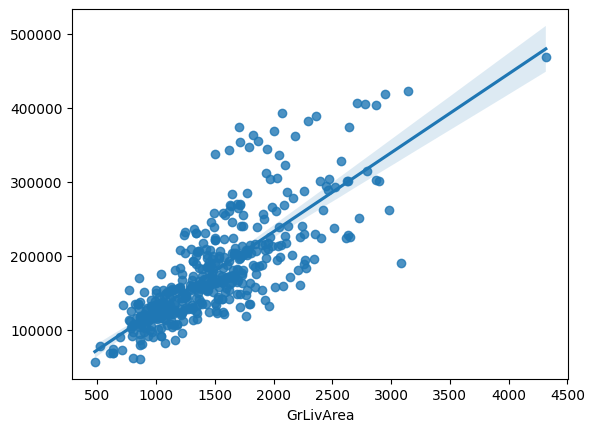

In [67]:
# предсказанный
sns.regplot(x=test_x['GrLivArea'], y=y_predict_test)

### Вывод

График показывает схожие результаты для тестовых и предсказанных значений

Средняя ошибка - 24000 при разбросе цен от 100 000 до 500 000 выглядит допустимой в рамках задания